# K-means Clustering

Name: Ragunathan E S

Register Number: 2248014

Subject : Machine Learning 

Lab: 5

# Objective

To implement K-means Clustering in Bone Mineral Density dataset.
To check whether he/she suffers from fracture.

# Problem Statement

Understand the Dataset & Features.

Perform Data Preprocessing Technique to Get Balanced Structured Data.

Perform Statistical Data Analysis and Derive Valuable Inferences.

Perform Exploratory Data Analysis and Derive Valuable Insights.

Compare the results from KMeans Clustering

# Importing required Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Loading the dataset

df=pd.read_csv("C:\\Users\\Ragunathan E S\\OneDrive\\Desktop\\ML\\BMD\\Bone_Mineral_density_data.csv")

In [46]:
df.head()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,61.9,164.0,47.0,17.474717,0.894,-2.4,0.6895,-2.95,0.7130,...,1,1,0,1,1,1,0,0,1,0
1,2,55.0,162.0,54.0,20.576132,1.333,1.3,0.9130,-1.30,1.0675,...,1,1,0,1,1,0,1,0,0,0
2,2,44.0,160.0,54.0,21.093750,1.157,-0.2,0.5190,-3.85,0.5770,...,1,1,0,1,1,1,0,0,0,0
3,1,64.7,158.0,59.0,23.634033,0.948,-2.3,0.7920,-2.15,0.9050,...,1,1,0,1,1,1,0,0,1,1
4,1,88.5,167.0,60.0,21.513859,1.114,-0.9,0.8250,-1.90,0.9385,...,1,1,0,1,1,1,0,0,1,0


In [47]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'L1-4', 'L1.4T', 'FN',
       'FNT', 'TL', 'TLT', 'ALT', 'AST', 'BUN', 'CREA', 'URIC', 'FBG', 'HDL-C',
       'LDL-C', 'Ca', 'P', 'Mg', 'Calsium', 'Calcitriol', 'Bisphosphonate',
       'Calcitonin', 'HTN', 'COPD', 'DM', 'Hyperlipidaemia', 'Hyperuricemia',
       'AS', 'VT', 'VD', 'OP', 'CAD', 'CKD', 'Fracture', 'Smoking',
       'Drinking'],
      dtype='object')

In [48]:
df.shape

(1537, 40)

# Data Preprocessing & EDA

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1537 non-null   int64  
 1   Age              1501 non-null   float64
 2   Height           1503 non-null   float64
 3   Weight           1503 non-null   float64
 4   BMI              1503 non-null   float64
 5   L1-4             1537 non-null   float64
 6   L1.4T            1537 non-null   float64
 7   FN               1537 non-null   float64
 8   FNT              1537 non-null   float64
 9   TL               1537 non-null   float64
 10  TLT              1537 non-null   float64
 11  ALT              1535 non-null   float64
 12  AST              1535 non-null   float64
 13  BUN              1536 non-null   float64
 14  CREA             1534 non-null   float64
 15  URIC             1537 non-null   float64
 16  FBG              1521 non-null   float64
 17  HDL-C         

In [50]:
df.nunique()

Gender                2
Age                 376
Height               49
Weight               80
BMI                 740
L1-4                623
L1.4T                85
FN                  817
FNT                 122
TL                  822
TLT                 131
ALT                  86
AST                  64
BUN                 510
CREA                575
URIC               1183
FBG                 392
HDL-C               182
LDL-C               367
Ca                   86
P                   106
Mg                   66
Calsium               2
Calcitriol            2
Bisphosphonate        2
Calcitonin            2
HTN                   2
COPD                  2
DM                    2
Hyperlipidaemia       2
Hyperuricemia         2
AS                    2
VT                    2
VD                    2
OP                    2
CAD                   2
CKD                   2
Fracture              2
Smoking               2
Drinking              2
dtype: int64

In [51]:
df.isnull().sum()

Gender              0
Age                36
Height             34
Weight             34
BMI                34
L1-4                0
L1.4T               0
FN                  0
FNT                 0
TL                  0
TLT                 0
ALT                 2
AST                 2
BUN                 1
CREA                3
URIC                0
FBG                16
HDL-C              17
LDL-C              14
Ca                  2
P                   5
Mg                  3
Calsium             0
Calcitriol          0
Bisphosphonate      0
Calcitonin          0
HTN                 0
COPD                0
DM                  0
Hyperlipidaemia     0
Hyperuricemia       0
AS                  0
VT                  0
VD                  0
OP                  0
CAD                 0
CKD                 0
Fracture            0
Smoking             0
Drinking            0
dtype: int64

In [52]:
df.describe()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
count,1537.000000,1501.000000,1503.000000,1503.000000,1503.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,...,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,1.385166,59.852232,165.820692,67.151031,24.312817,1.136400,-0.551972,0.866763,-1.300755,0.934433,...,0.174366,0.749512,0.018868,0.072869,0.369551,0.202993,0.038386,0.020169,0.257645,0.227716
std,0.486793,12.940563,8.087217,11.991113,3.316477,0.187552,1.526073,0.145872,1.111612,0.153444,...,0.379547,0.433435,0.136103,0.260006,0.482840,0.402358,0.192190,0.140624,0.437480,0.419495
min,1.000000,28.600000,141.000000,23.000000,9.213267,0.763000,-3.500000,0.327500,-5.050000,0.308000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,51.000000,160.000000,59.000000,22.066075,0.999000,-1.600000,0.768500,-2.050000,0.835000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,57.000000,167.000000,67.000000,24.218750,1.124000,-0.700000,0.858500,-1.400000,0.926000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,67.300000,172.000000,75.000000,26.356049,1.256000,0.400000,0.965000,-0.550000,1.035500,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,99.800000,187.000000,113.000000,37.261470,1.936000,6.000000,1.419000,2.700000,1.456500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


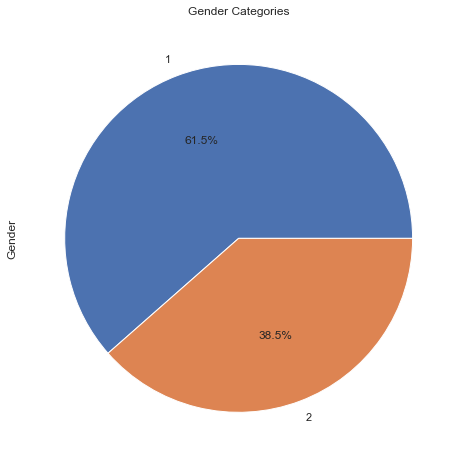

In [56]:
plt.figure(figsize=(10,8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Gender Categories')
plt.show()

<AxesSubplot:>

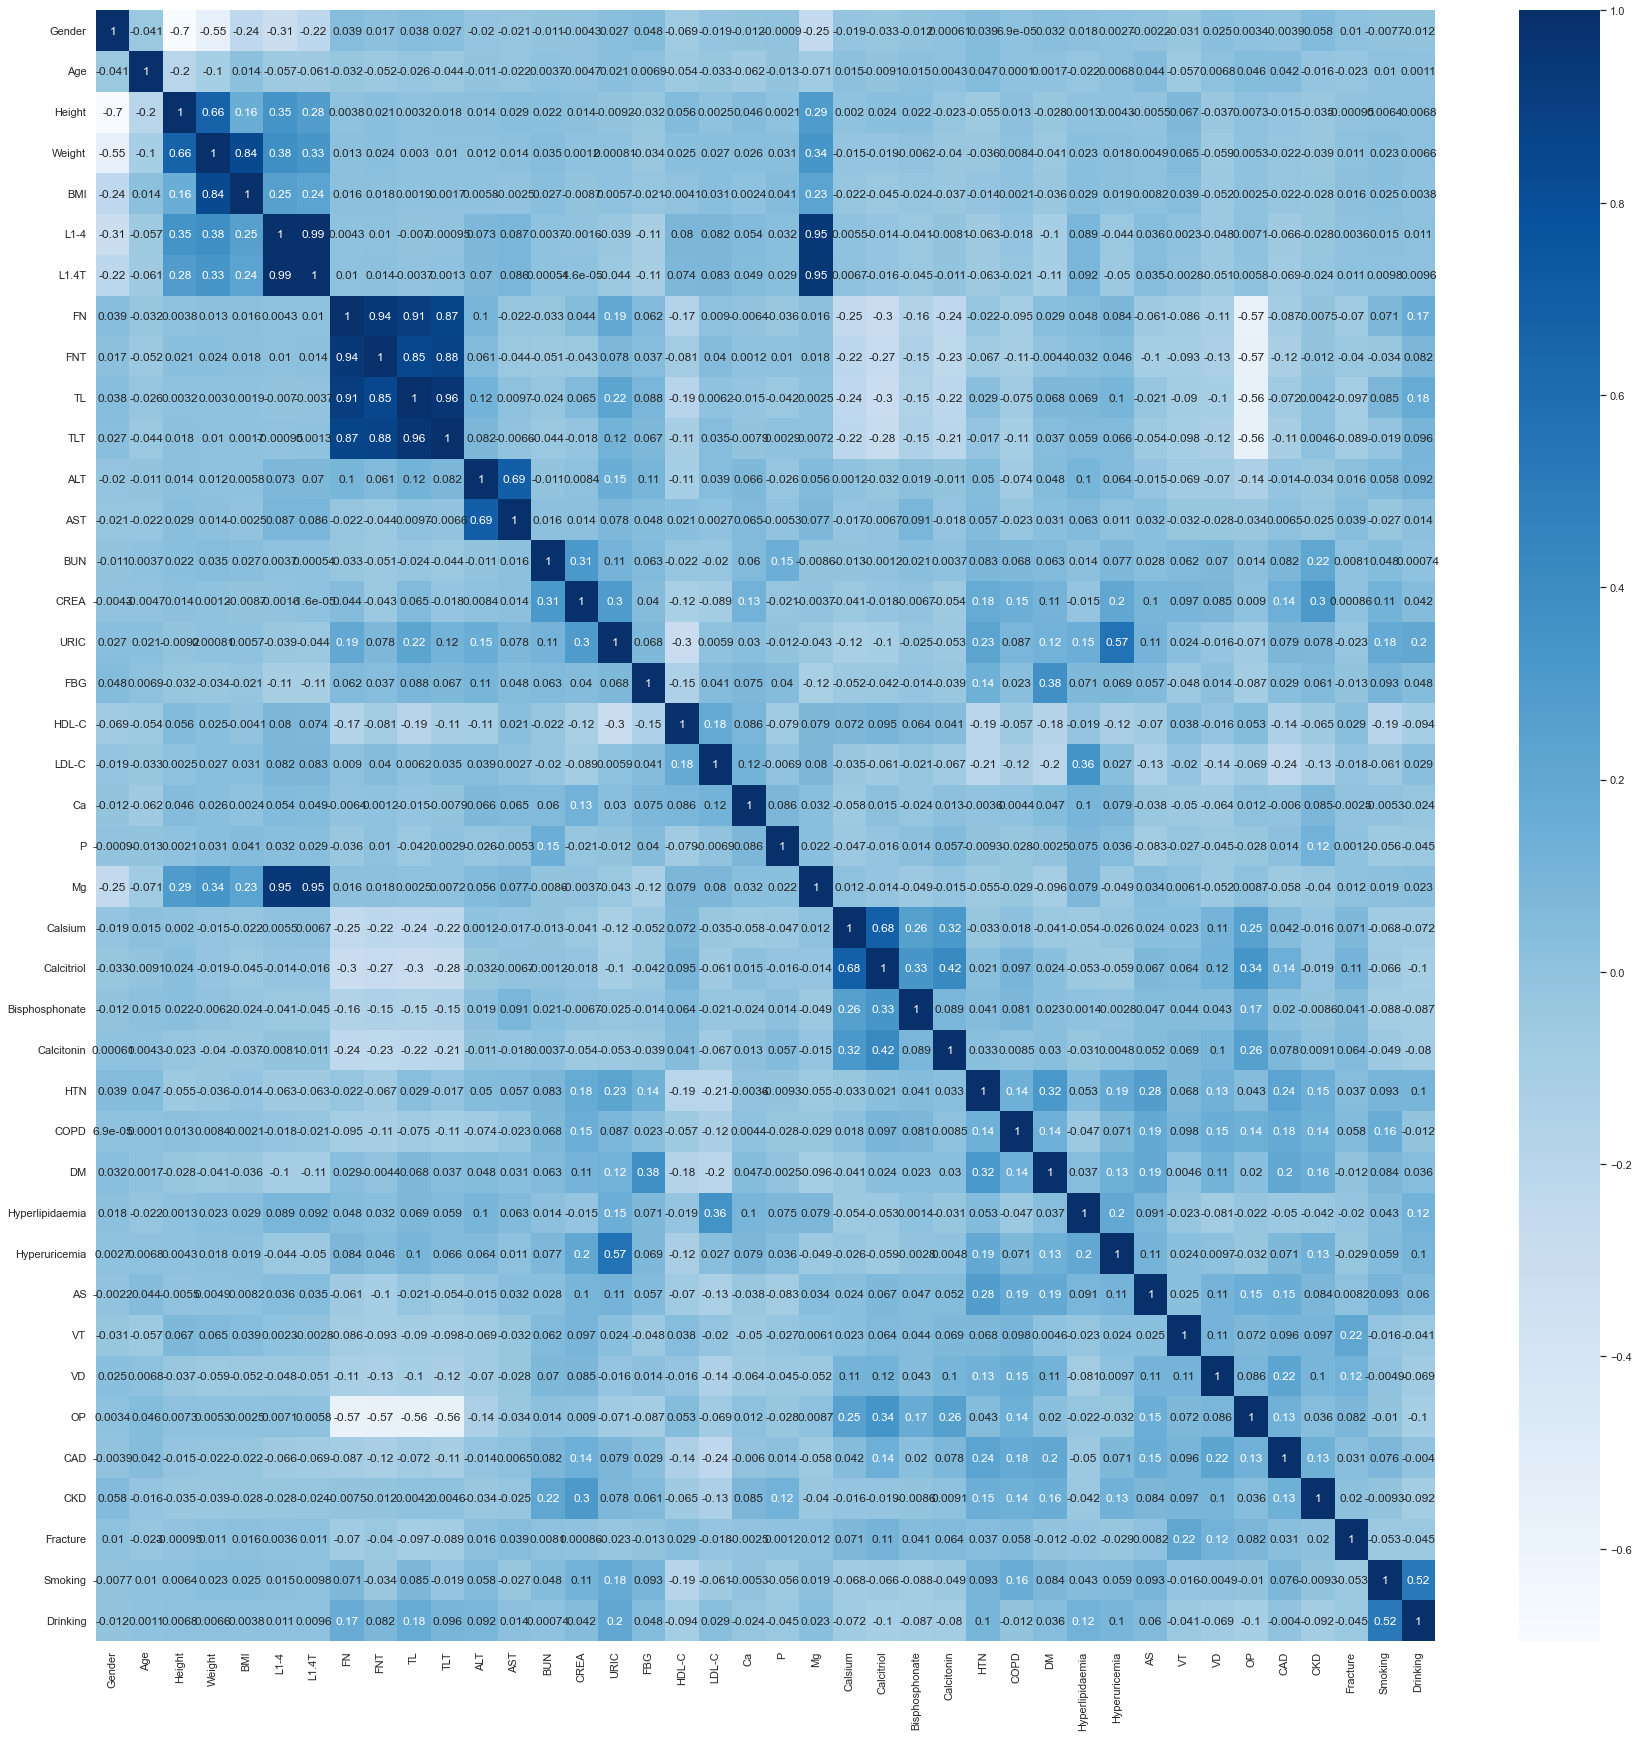

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

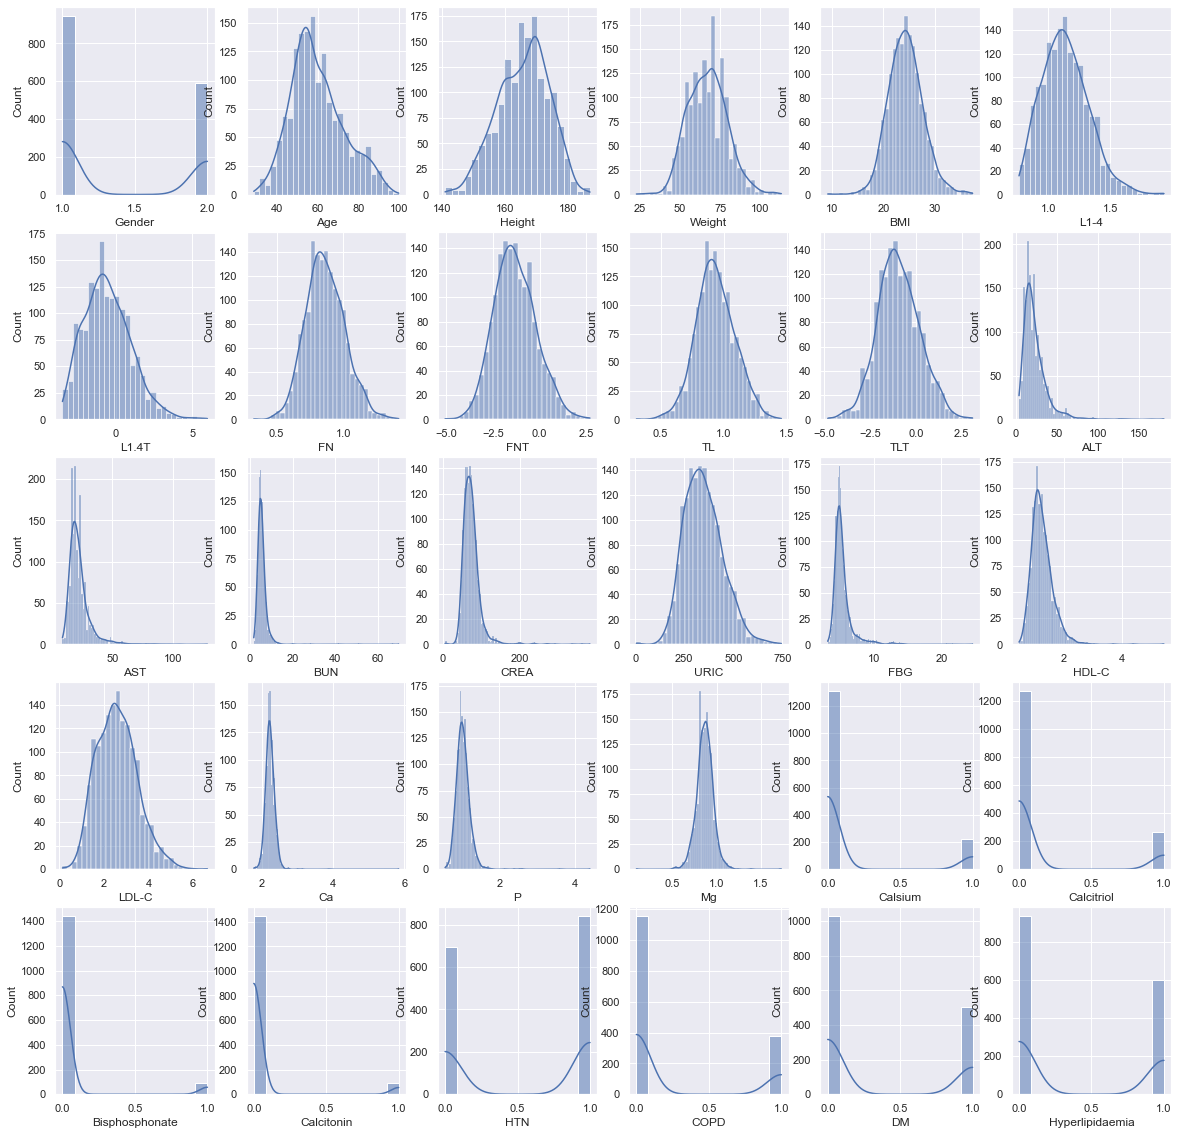

In [54]:
plt.figure(figsize = (20, 20))
sns.set(style="darkgrid")
plotnumber = 1
for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
    plotnumber += 1
plt.show()

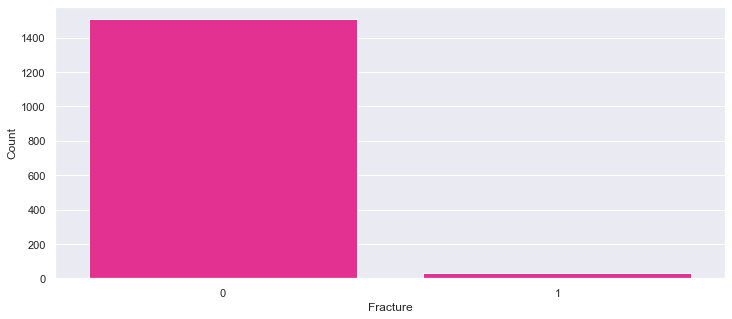

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a size of 12x5 inches
plt.figure(figsize=(12, 5))

# Create a count plot of the 'Fracture' column in the 'df' dataframe
sns.countplot(x='Fracture', data=df, palette=['#FF1493'])

# Set the label for the y-axis to "Count"
plt.ylabel('Count')

# Display the plot
plt.show()

# Splitting into Features and Target

In [72]:
X=df.drop(['Fracture'],axis=1)
y=df['Fracture']

In [73]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [74]:
imputer.fit(X)
X=imputer.transform(X)

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

# K-means Clustering

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [77]:
kmeans.cluster_centers_

array([[ 1.39239130e+00,  5.97905449e+01,  1.65736473e+02,
         6.68957855e+01,  2.42459203e+01,  1.13870217e+00,
        -5.23022826e-01,  8.47322283e-01, -1.36636957e+00,
         9.10754891e-01, -1.02646250e+00,  2.16582114e+01,
         2.21007209e+01,  5.37128990e+00,  6.82080157e+01,
         2.84592337e+02,  5.29926839e+00,  1.32105016e+00,
         2.59216328e+00,  2.23641083e+00,  1.03460770e+00,
         8.70004487e-01,  1.73913043e-01,  1.96739130e-01,
         6.41304348e-02,  6.95652174e-02,  4.72826087e-01,
         2.19565217e-01,  2.95652174e-01,  3.41304348e-01,
         2.06521739e-02,  7.26086957e-01,  2.06521739e-02,
         7.06521739e-02,  4.07608696e-01,  1.82608696e-01,
         2.50000000e-02,  2.04347826e-01,  1.68478261e-01],
       [ 1.37439222e+00,  5.99442123e+01,  1.65946270e+02,
         6.75316246e+01,  2.44125656e+01,  1.13296759e+00,
        -5.95137763e-01,  8.95750405e-01, -1.20291734e+00,
         9.69739060e-01, -7.90737439e-01,  2.63819359e+

In [78]:
kmeans.inertia_

7260253.120575235

In [79]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 905 out of 1537 samples were correctly labeled.


In [80]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.59


# Elbow Method

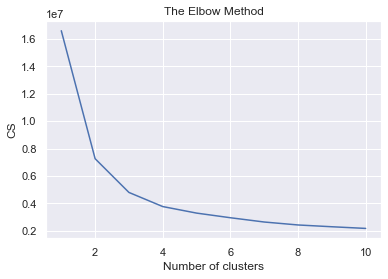

In [81]:
from sklearn.cluster import KMeans
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 905 out of 1537 samples were correctly labeled.
Accuracy score: 0.59


# KMeans with different cluster(K=3)

In [96]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# check how many of the samples were correctly labeled

labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 685 out of 1537 samples were correctly labeled.
Accuracy score: 0.45


# Conclusion

Here, we can conclude by saying he/she suffers from fracture using KMeans Clustering. And also,
we used different cluster k=2 and k=3.

n-cluster = 2 --> 905 out of 1537 samples were correctly labeled.

n-cluster = 3 --> 685 out of 1537 samples were correctly labeled.